In [ ]:
! pip install -q kaggle

In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle (1).json


{'kaggle.json': b'{"username":"vinayak96","key":"c2a7f152d18e0cca427f954d326edb00"}'}

In [ ]:
! mkdir ~/.kaggle

! cp kaggle.json ~/.kaggle/

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [ ]:
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle competitions download -c iiitb2020-home-credit-default-risk -p /content

 70% 9.00M/12.9M [00:00<00:00, 21.3MB/s]
100% 12.9M/12.9M [00:00<00:00, 23.9MB/s]
  0% 0.00/380k [00:00<?, ?B/s]
100% 380k/380k [00:00<00:00, 114MB/s]
 37% 9.00M/24.0M [00:00<00:00, 40.6MB/s]
100% 24.0M/24.0M [00:00<00:00, 68.9MB/s]
 94% 138M/147M [00:01<00:00, 66.0MB/s]
100% 147M/147M [00:01<00:00, 86.9MB/s]
 86% 40.0M/46.4M [00:00<00:00, 65.7MB/s]
100% 46.4M/46.4M [00:00<00:00, 117MB/s] 
 96% 113M/117M [00:01<00:00, 103MB/s] 
100% 117M/117M [00:01<00:00, 94.2MB/s]
 76% 60.0M/78.9M [00:01<00:00, 27.6MB/s]
100% 78.9M/78.9M [00:01<00:00, 48.1MB/s]
100% 282M/283M [00:02<00:00, 145MB/s]
100% 283M/283M [00:02<00:00, 129MB/s]
 89% 94.0M/106M [00:01<00:00, 27.0MB/s]
100% 106M/106M [00:02<00:00, 54.8MB/s] 


In [ ]:
!unzip \*.zip

Archive:  POS_CASH_balance.csv.zip
  inflating: POS_CASH_balance.csv    

Archive:  application_train.csv.zip
  inflating: application_train.csv   

Archive:  credit_card_balance.csv.zip
  inflating: credit_card_balance.csv  

Archive:  installments_payments.csv.zip
  inflating: installments_payments.csv  

Archive:  previous_application.csv.zip
  inflating: previous_application.csv  

Archive:  bureau_balance.csv.zip
  inflating: bureau_balance.csv      

Archive:  bureau.csv.zip
  inflating: bureau.csv              

Archive:  sample_submission.csv.zip
  inflating: sample_submission.csv   

Archive:  application_test.csv.zip
  inflating: application_test.csv    

9 archives were successfully processed.


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
%matplotlib inline

In [ ]:
application_train = pd.read_csv("/content/application_train.csv")
credit_card_balance = pd.read_csv("/content/credit_card_balance.csv")
installments_payments = pd.read_csv("/content/installments_payments.csv")
previous_application = pd.read_csv("/content/previous_application.csv")

In [ ]:
print("Application Shape: ", application_train.shape)
print("Credit_card_balance Shape: ", credit_card_balance.shape)
print("Installments_payments Shape: ", installments_payments.shape)
print("Previous_application Shape: ", previous_application.shape)

Application Shape:  (199882, 122)
Credit_card_balance Shape:  (3840312, 23)
Installments_payments Shape:  (13605401, 8)
Previous_application Shape:  (1670214, 37)


In [ ]:
previous_application.info()

In [ ]:
installments_payments.info()

In [ ]:
credit_card_balance.info()

In [ ]:
previous_application.describe()

In [ ]:
installments_payments.describe()

In [ ]:
credit_card_balance.describe()

In [ ]:
previous_application.head()

In [ ]:
installments_payments.head()

In [ ]:
credit_card_balance.head()


################################## User defined Functions ##########################################

In [ ]:
def getCnamesNumeric(df):
    return list(df.select_dtypes(exclude='object').columns)

def getCnamesObject(df):
    return list(df.select_dtypes(include='object').columns)

def getDetailsAboutMissingValuesAllColumns(df):
  return df.isna().sum()

def getDetailsAboutOnlyMissingValuesColumns(df):
  print("Shape: ", df.shape)
  return df[list(df.columns[df.isna().any()])].isna().sum()

def dropColumns(df, columnNames):
  for column in columnNames:
    df = df.drop(column, axis = 1)
  return df

def imputeCategoricalMissingValuesUsingMode(df):
  columnName = getCnamesObject(df)
  for col in columnName: df[col].fillna(df[col].mode().values[0], inplace = True)

def imputeNumericMissingValuesUsingMean(df):
  columnName = getCnamesNumeric(df)
  for col in columnName: df[col].fillna(df[col].mean(), inplace = True)

def plotCountPlotForCategoricalFeatures(df, cnamesObject):
  number_of_rows = (len(cnamesObject) + 1)/2
  plt.figure(figsize=(20, 6*number_of_rows))

  for i in range(0,len(cnamesObject)):
    plt.subplot(number_of_rows,2,i+1)
    sns.countplot(y=cnamesObject[i], data = df)
    plt.title(cnamesObject[i])
    plt.tight_layout()

def distributionOfCategoricalFeaturesWRTTarget(df, cnamesObject):
  plt.figure(figsize=(20, 20))

  for i in range(0,len(cnamesObject)):
    plt.subplot(5,2,i+1)
    sns.barplot(data=df, x="Accident_Severity", y=cnamesObject[i])
    plt.title(cnamesObject[i])
    plt.tight_layout()

def drawCorrelationMatrix(df) :
  length = len(getCnamesNumeric(df))
  correlaionMatrix = df.corr()
  plt.figure(figsize=(length,length*0.8))
  sns.heatmap(correlaionMatrix, annot=True, cmap = 'viridis')

def drawDistributionPlot(df, cnamesNumeric):
  number_of_rows = (len(cnamesNumeric) + 1)/2
  plt.figure(figsize=(20, 4*number_of_rows))

  for i in range(0, len(cnamesNumeric)):
    plt.subplot(number_of_rows,3,i+1)
    sns.kdeplot(df[cnamesNumeric[i]])
    plt.title(cnamesNumeric[i])
    plt.tight_layout()
    

In [ ]:
paCC = getCnamesObject(previous_application)
print("Number of categorical columns in previous_application: ", len(paCC), "\n", paCC)
paCC.remove('SK_ID_PREV')
paCC.remove('SK_ID_CURR')

ipCC = getCnamesObject(installments_payments)
print("Number of categorical columns in installments_payments: ", len(ipCC), "\n", ipCC)

ccbCC = getCnamesObject(credit_card_balance)
print("Number of categorical columns in credit_card_balance: ", len(ccbCC), "\n", ccbCC)
ccbCC.remove('SK_ID_PREV')
ccbCC.remove('SK_ID_CURR')

paNC = getCnamesNumeric(previous_application)
print("Number of numerical columns in previous_application: ", len(paNC), "\n", paNC)
ipNC = getCnamesNumeric(installments_payments)
print("Number of numerical columns in installments_payments: ", len(ipNC), "\n", ipNC)
ccbNC = getCnamesNumeric(credit_card_balance)
print("Number of numerical columns in credit_card_balance: ", len(ccbNC), "\n", ccbNC)

Number of categorical columns in previous_application:  18 
 ['SK_ID_PREV', 'SK_ID_CURR', 'NAME_CONTRACT_TYPE', 'WEEKDAY_APPR_PROCESS_START', 'FLAG_LAST_APPL_PER_CONTRACT', 'NAME_CASH_LOAN_PURPOSE', 'NAME_CONTRACT_STATUS', 'NAME_PAYMENT_TYPE', 'CODE_REJECT_REASON', 'NAME_TYPE_SUITE', 'NAME_CLIENT_TYPE', 'NAME_GOODS_CATEGORY', 'NAME_PORTFOLIO', 'NAME_PRODUCT_TYPE', 'CHANNEL_TYPE', 'NAME_SELLER_INDUSTRY', 'NAME_YIELD_GROUP', 'PRODUCT_COMBINATION']
Number of categorical columns in installments_payments:  2 
 ['SK_ID_PREV', 'SK_ID_CURR']
Number of categorical columns in credit_card_balance:  3 
 ['SK_ID_PREV', 'SK_ID_CURR', 'NAME_CONTRACT_STATUS']
Number of numerical columns in previous_application:  19 
 ['AMT_ANNUITY', 'AMT_APPLICATION', 'AMT_CREDIT', 'AMT_DOWN_PAYMENT', 'AMT_GOODS_PRICE', 'HOUR_APPR_PROCESS_START', 'NFLAG_LAST_APPL_IN_DAY', 'RATE_DOWN_PAYMENT', 'RATE_INTEREST_PRIMARY', 'RATE_INTEREST_PRIVILEGED', 'DAYS_DECISION', 'SELLERPLACE_AREA', 'CNT_PAYMENT', 'DAYS_FIRST_DRAWING', 

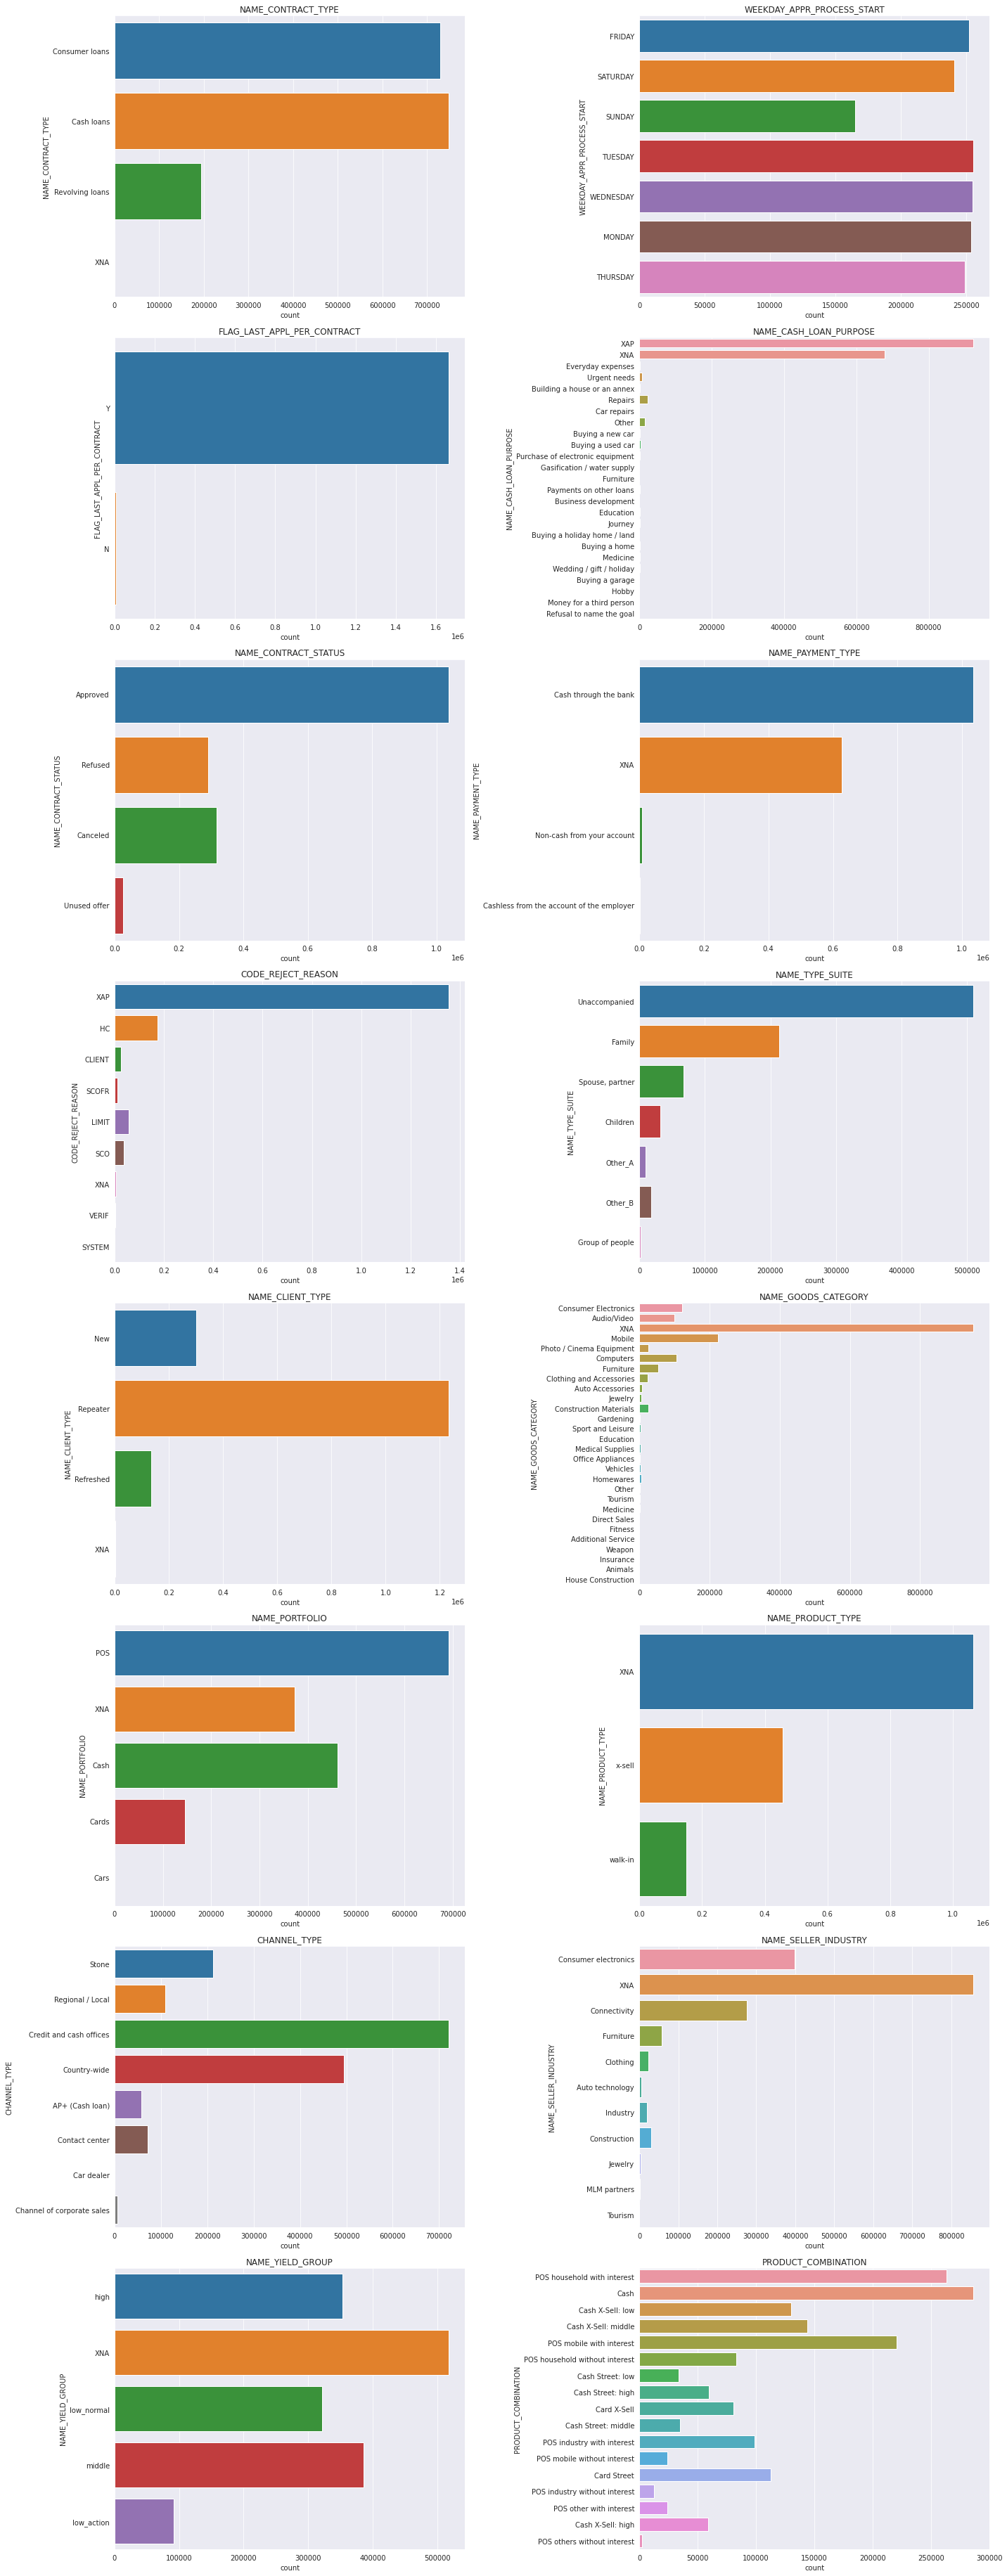

In [ ]:
plotCountPlotForCategoricalFeatures(previous_application, paCC)

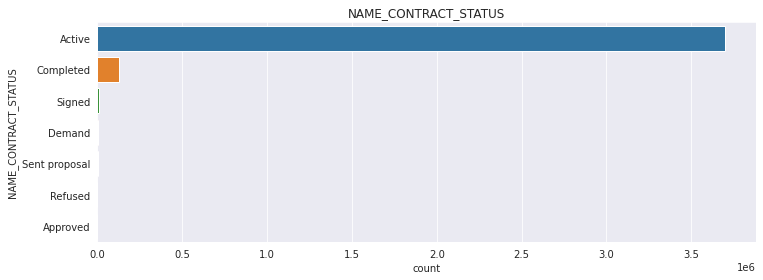

In [ ]:
plotCountPlotForCategoricalFeatures(credit_card_balance, ccbCC)

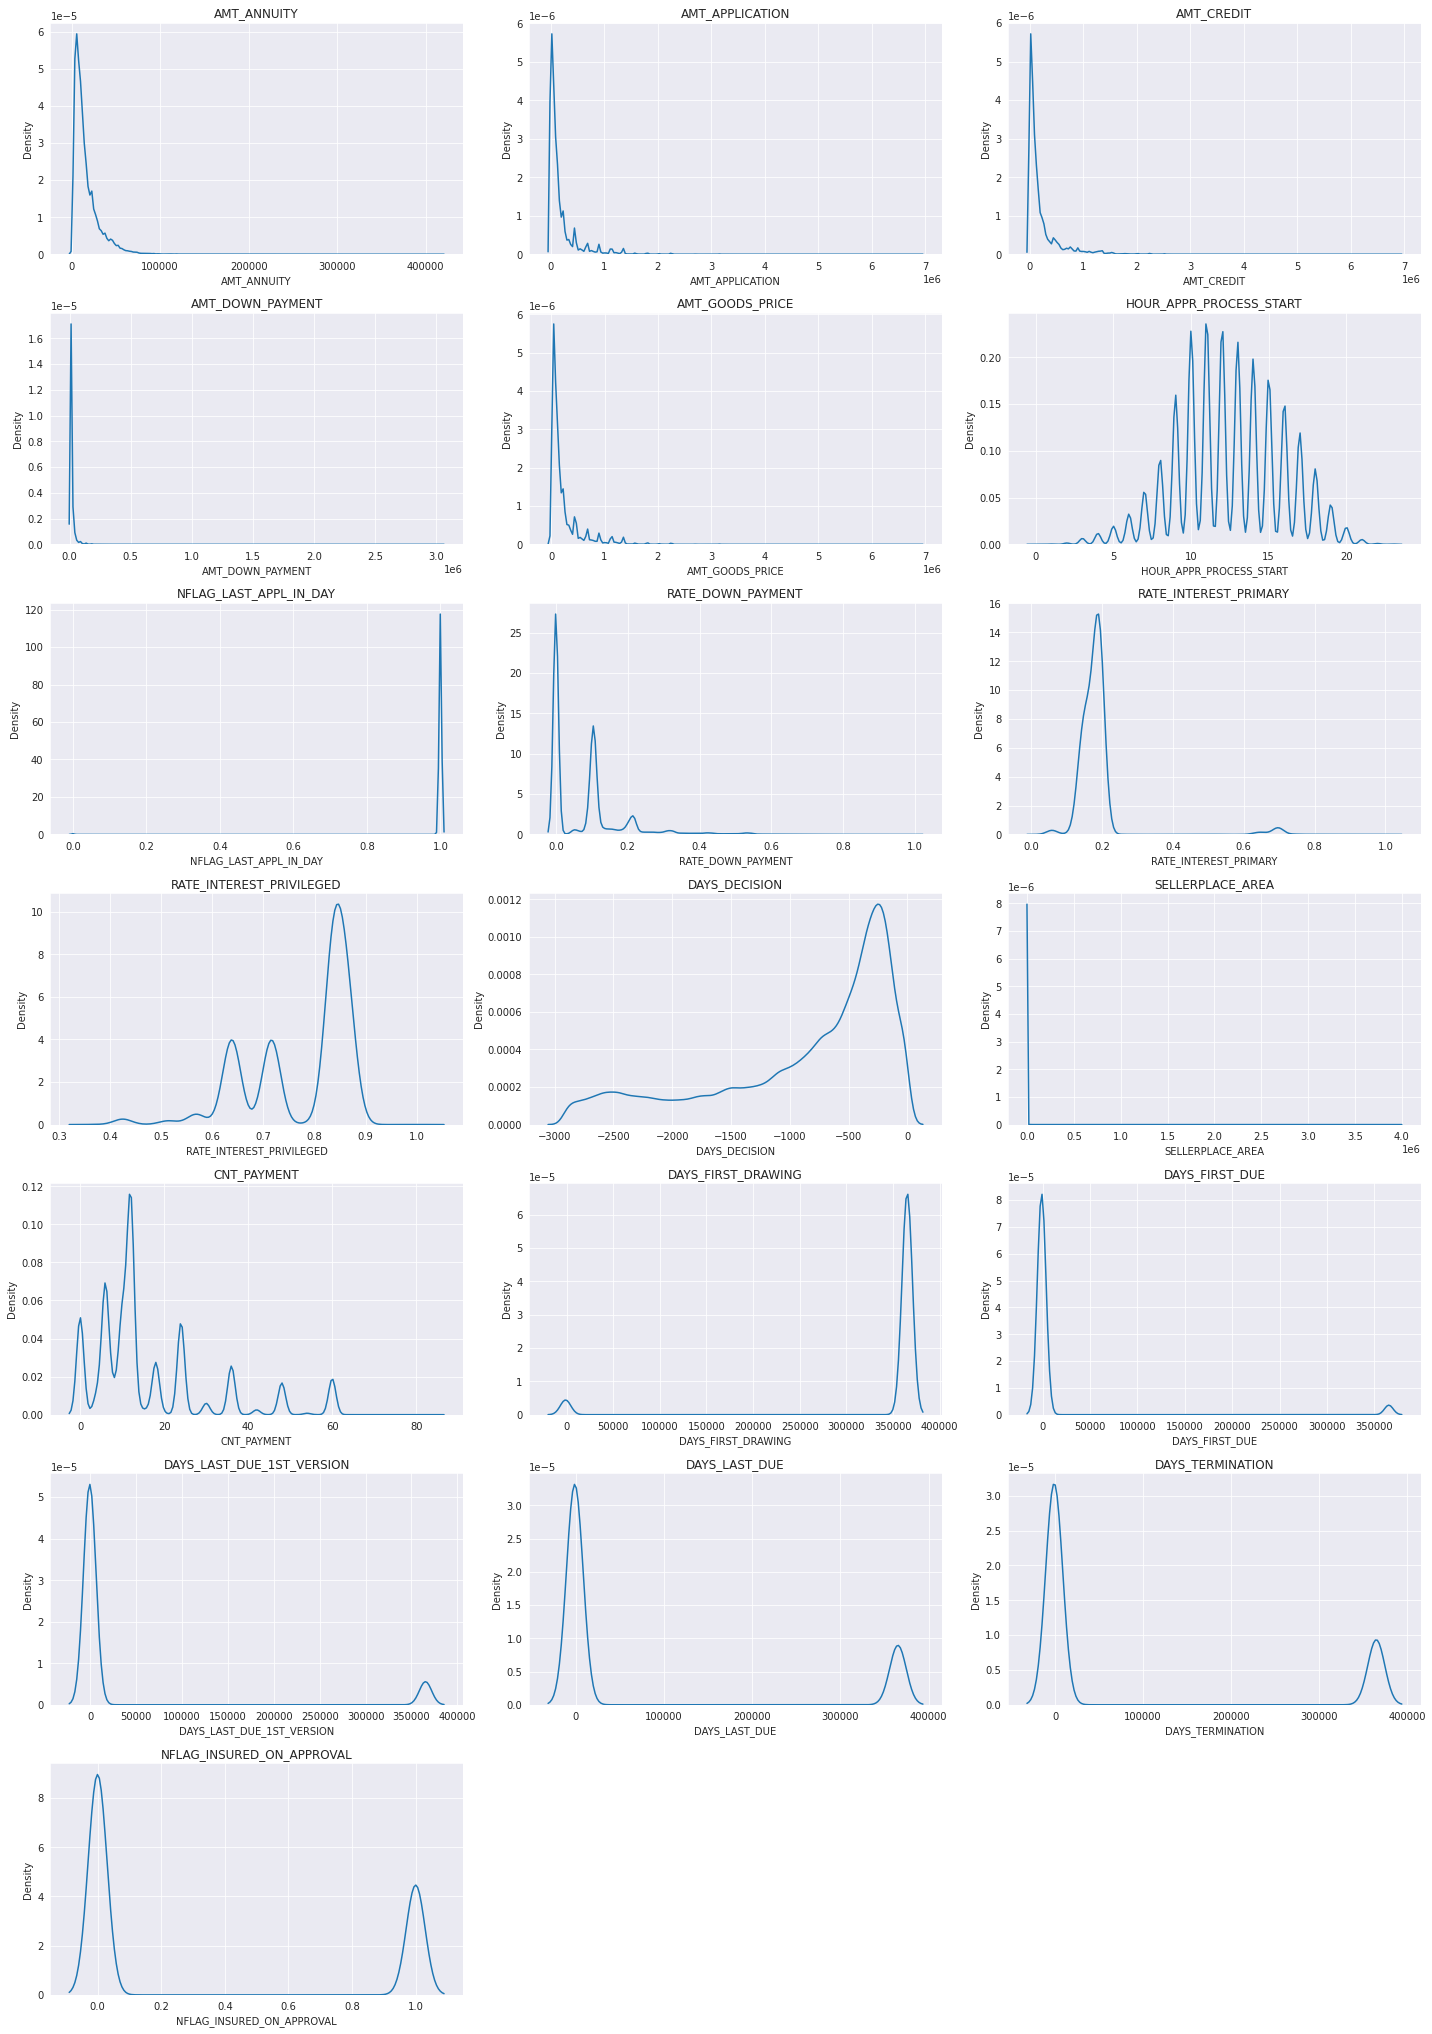

In [ ]:
drawDistributionPlot(previous_application, paNC)

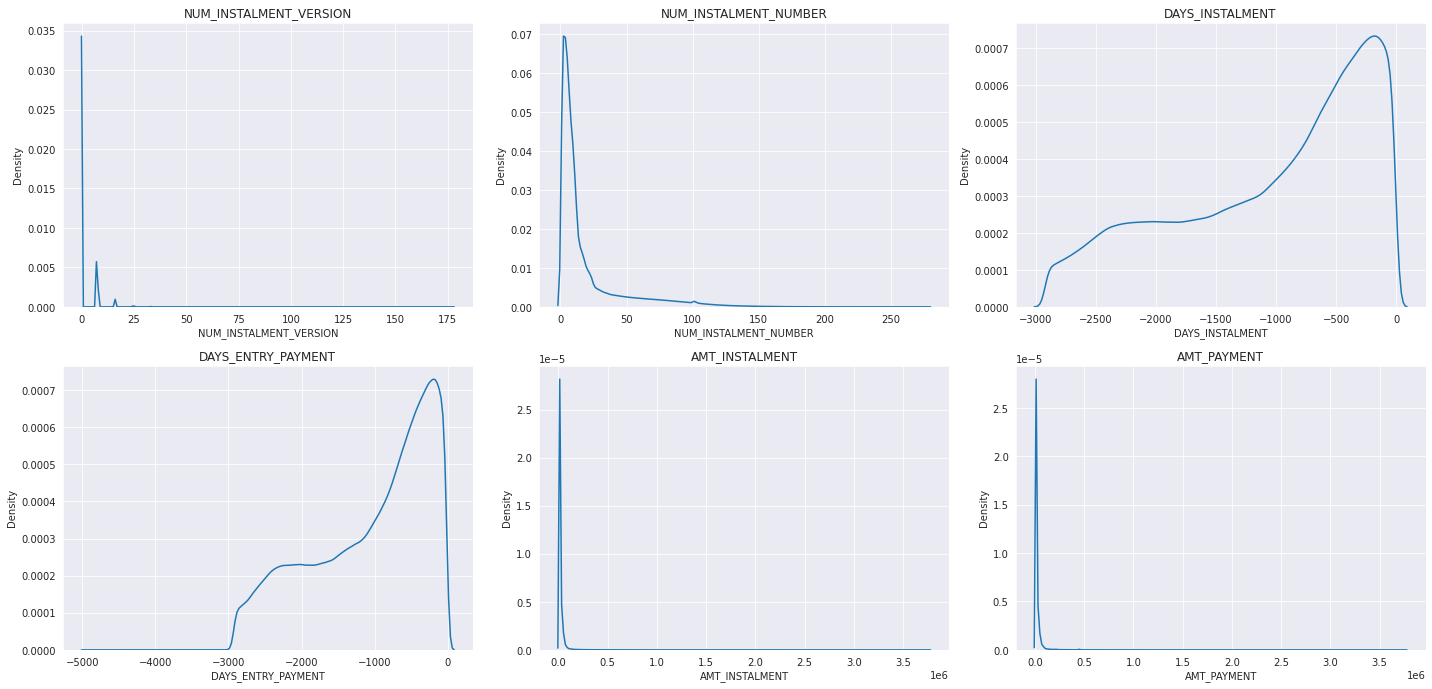

In [ ]:
drawDistributionPlot(installments_payments, ipNC)

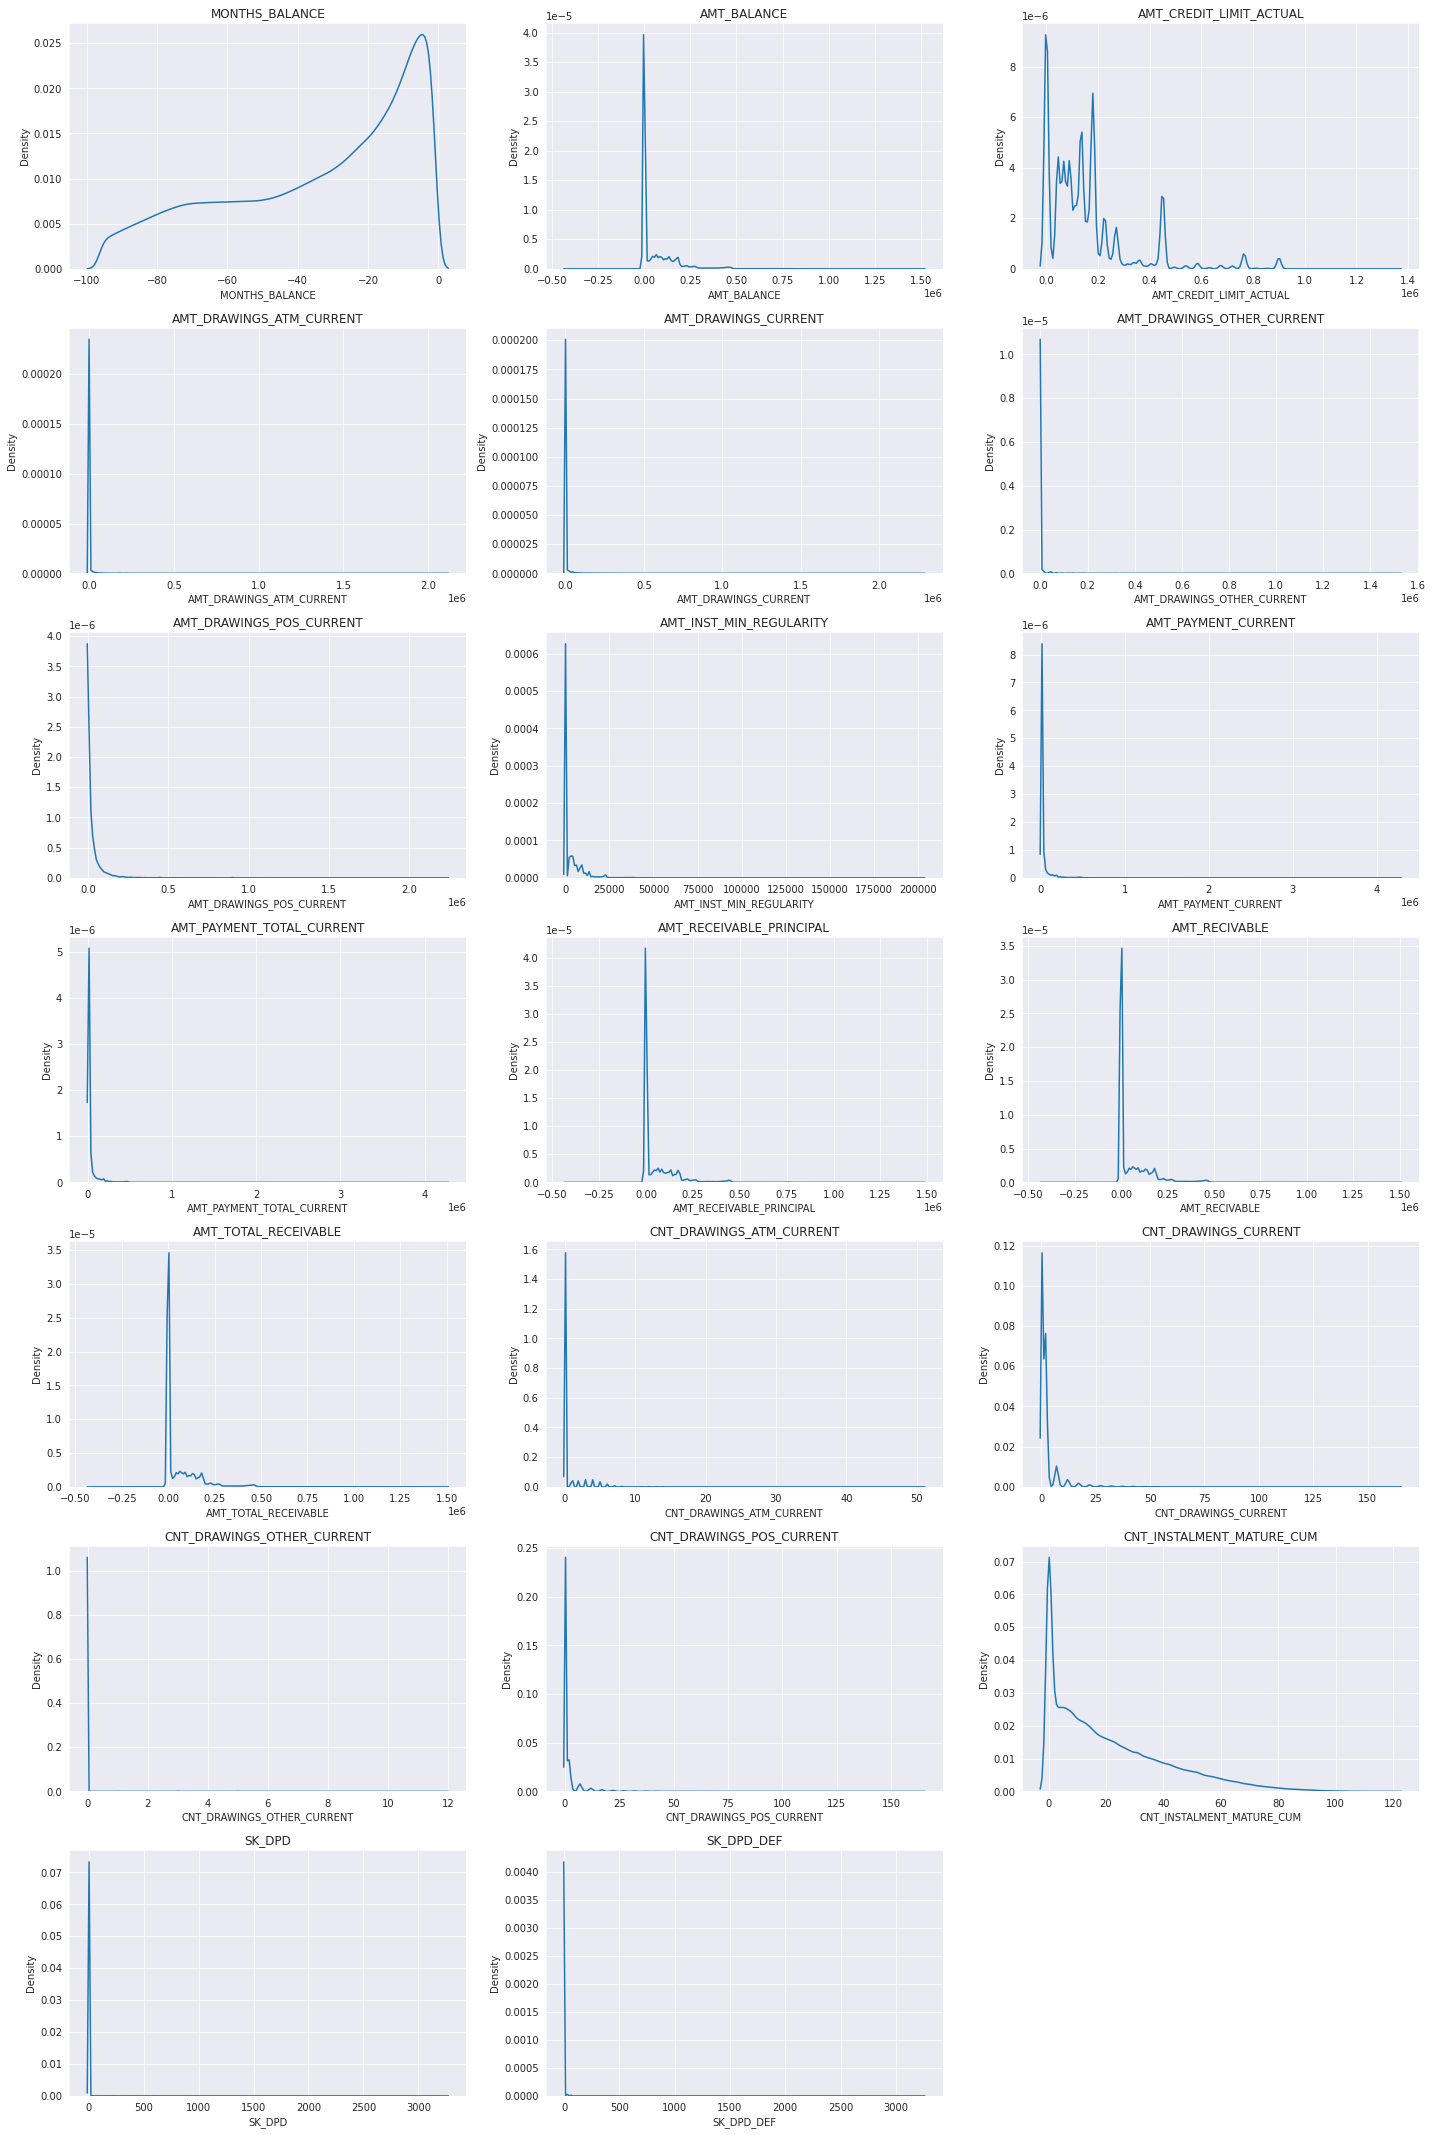

In [ ]:
drawDistributionPlot(credit_card_balance, ccbNC)

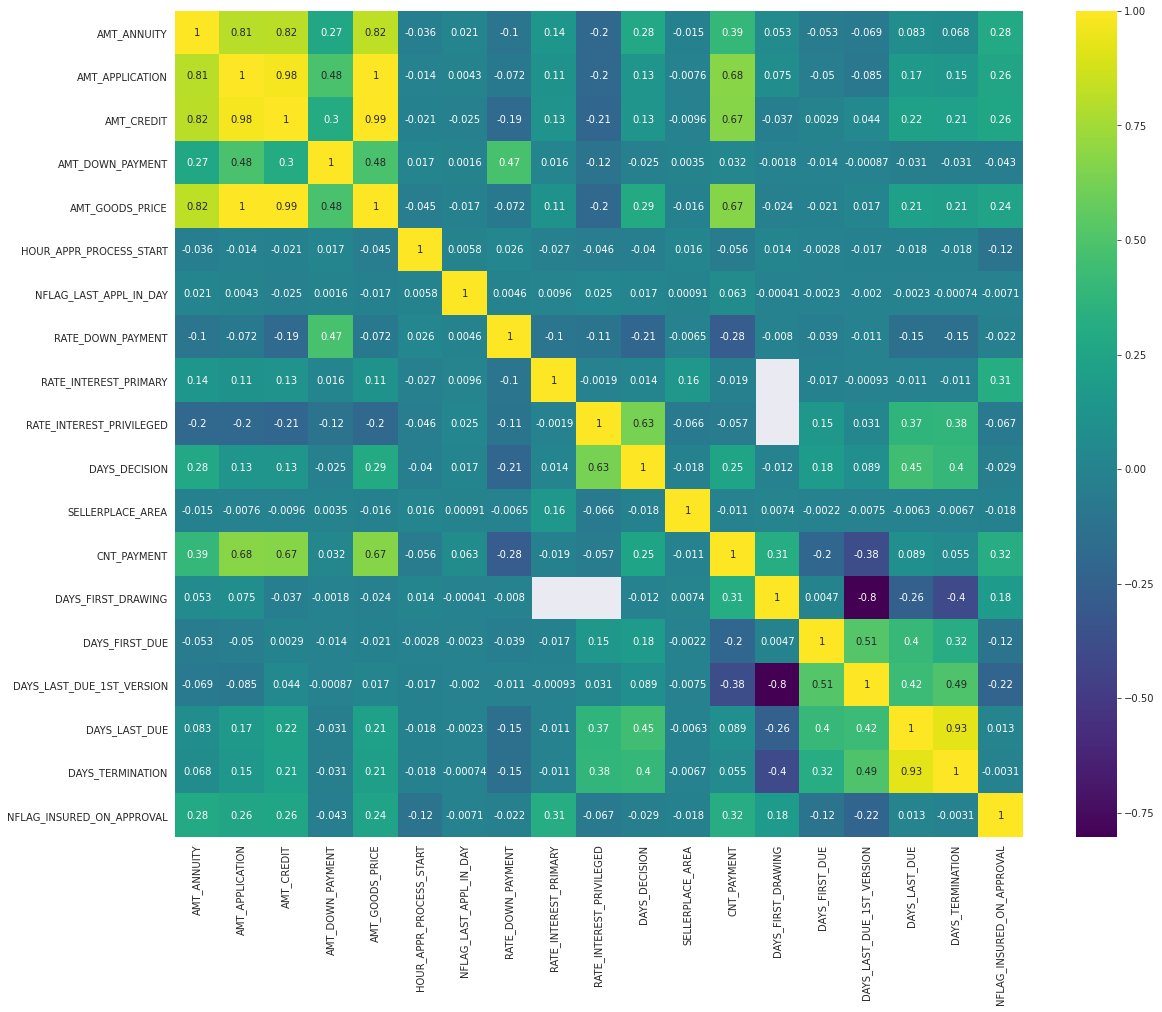

In [ ]:
drawCorrelationMatrix(previous_application)

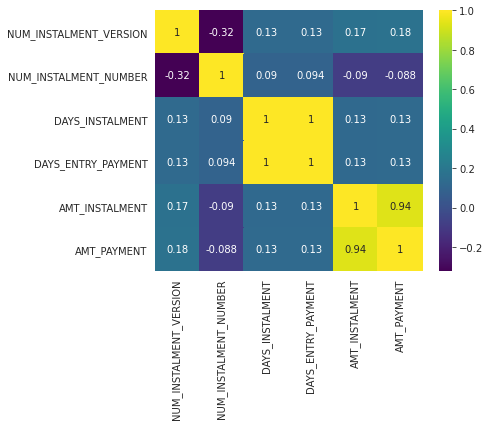

In [ ]:
drawCorrelationMatrix(installments_payments)

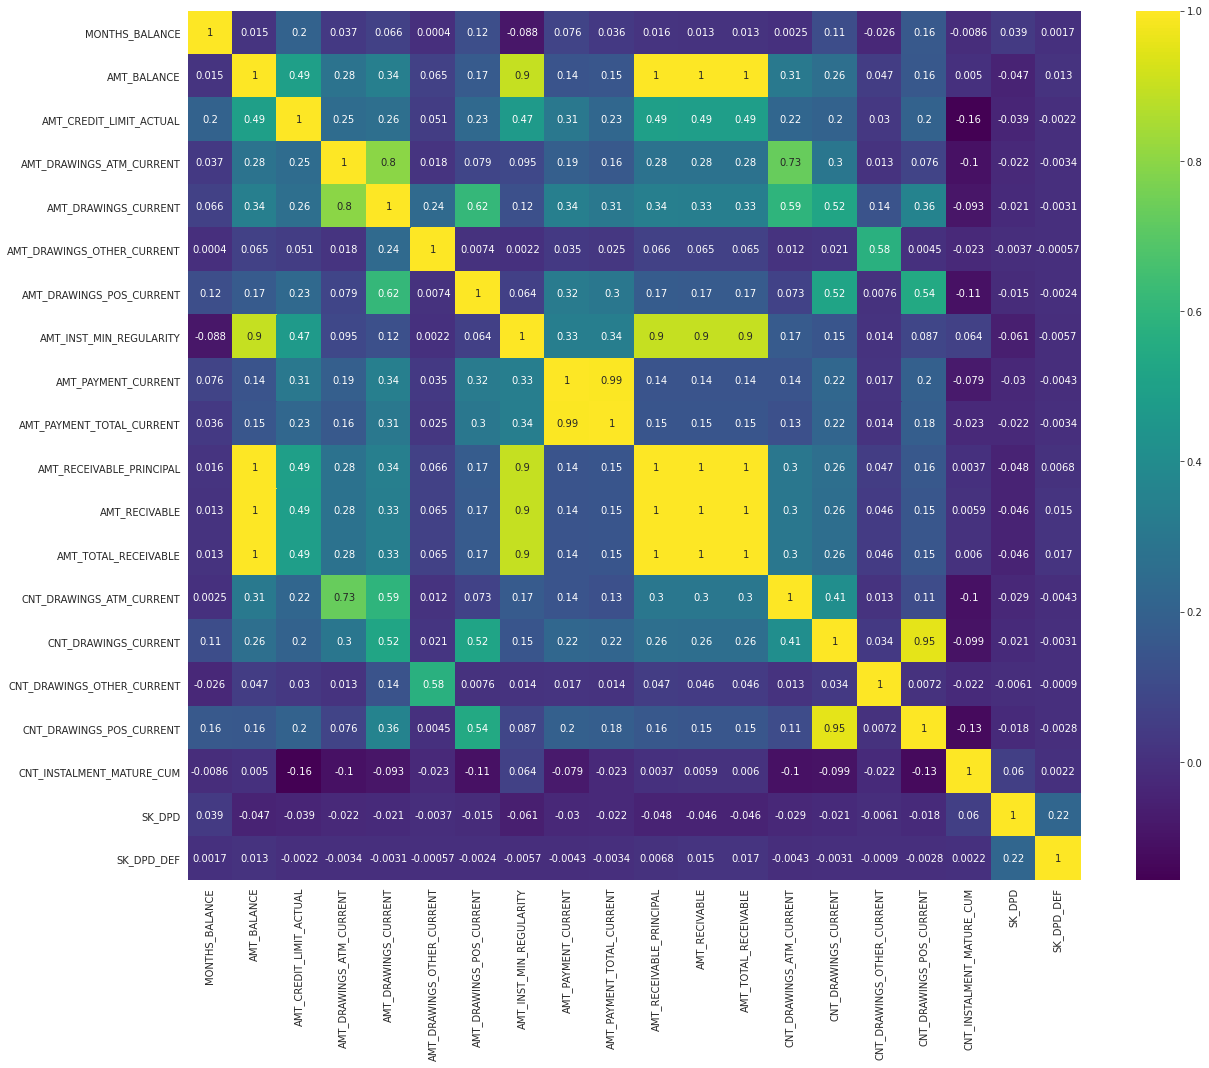

In [ ]:
drawCorrelationMatrix(credit_card_balance)

In [ ]:
getDetailsAboutOnlyMissingValuesColumns(previous_application)

Shape:  (1670214, 32)


Series([], dtype: float64)

In [ ]:
#Drop the data with more than 50% missing values becuase imputing them doesn't makes sense
missingValueColumns = ['AMT_DOWN_PAYMENT', 'RATE_DOWN_PAYMENT','RATE_INTEREST_PRIMARY','RATE_INTEREST_PRIVILEGED','NAME_TYPE_SUITE']
previous_application = dropColumns(previous_application, missingValueColumns)

In [ ]:
getDetailsAboutOnlyMissingValuesColumns(installments_payments)

Shape:  (13605401, 8)


Series([], dtype: float64)

In [ ]:
getDetailsAboutOnlyMissingValuesColumns(credit_card_balance)

Shape:  (3840312, 23)


Series([], dtype: float64)

In [ ]:
imputeNumericMissingValuesUsingMean(previous_application)
imputeNumericMissingValuesUsingMean(installments_payments)
imputeNumericMissingValuesUsingMean(credit_card_balance)

imputeCategoricalMissingValuesUsingMode(previous_application)